# Extracting Effective Features for Descriptive Analysis of Household Energy Consumption Using Smart Home Data

par Kévin Tang

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from collections import Counter

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin_min

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Extraction des données

In [ ]:
#Lecture du fichier de données
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Master_Info/M2/Stage/Articles/Experimentations/Extracting Effective Features for Descriptive Analysis of Household Energy Consumption Using Smart Home Data/recs2015_public_v4.csv', sep=',')

In [ ]:
data

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,10002,3,7,NONE,R,2,0,0,0,-2,...,1,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
2,10003,3,6,METRO,U,2,0,1,0,1,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
3,10004,2,4,MICRO,C,2,0,1,0,1,...,0,NaN,-2,-2,137.45,-2,-2,91.33,2,0
4,10005,1,2,METRO,U,2,0,1,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681,15682,2,3,METRO,U,5,0,-2,-2,-2,...,1,102.40,5,1,137.45,-2,-2,91.33,-2,-2
5682,15683,3,6,MICRO,C,2,0,0,0,-2,...,0,99.34,1,0,137.45,-2,-2,91.33,-2,-2
5683,15684,2,3,METRO,U,5,0,-2,-2,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
5684,15685,3,7,METRO,R,2,0,0,0,-2,...,0,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2


In [ ]:
# data = data.dropna()

## Feature selection

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
# Sélectionner toutes les colonnes de type "object"
data_object = data.select_dtypes(include=['object'])

In [ ]:
colonnes_object = data_object.columns
print(colonnes_object)

Index(['METROMICRO', 'UATYP10', 'CLIMATE_REGION_PUB', 'IECC_CLIMATE_PUB'], dtype='object')


In [ ]:
data = data.drop(columns=data_object.columns)

### Correlation Analysis on All Dimensions

In [ ]:
correlation = data.corr()

In [ ]:
correlation["TOTALDOL"].sort_values(ascending=False).head(75)

TOTALDOL        1.000000
DOLLAREL        0.852948
TOTALBTU        0.777118
KWH             0.690416
BTUEL           0.690416
TOTALDOLSPH     0.665636
TOTROOMS        0.528030
TOTSQFT_EN      0.526385
WINDOWS         0.524226
TOTALDOLNEC     0.517605
TOTALBTUSPH     0.515475
BEDROOMS        0.502485
TOTHSQFT        0.498281
DOLELNEC        0.481529
DOLELLGT        0.479245
LGTOUTNUM       0.475424
SWIMPOOL        0.467604
DOLELCOL        0.457553
TOTALBTUNEC     0.446687
LGTINNUM        0.445001
DOLELAHUCOL     0.438898
DOLELRFG        0.437951
TOTALDOLWTH     0.437840
DOLELTVREL      0.437124
KWHNEC          0.433467
BTUELNEC        0.433467
KWHLGT          0.429326
BTUELLGT        0.429326
TOTCSQFT        0.429163
OTHROOMS        0.426034
CELLAR          0.420001
TOTALBTUWTH     0.415972
SOLAR           0.409561
ATTIC           0.406654
DOLELCFAN       0.405235
BTUELTVREL      0.404958
KWHTVREL        0.404958
KWHCOL          0.404374
BTUELCOL        0.404374
KWHAHUCOL       0.402950


In [ ]:
correlation["TOTALBTU"].sort_values(ascending=False).head(75)

TOTALBTU        1.000000
TOTALBTUSPH     0.855773
TOTALDOL        0.777118
BTUNG           0.715579
CUFEETNG        0.713637
BTUNGSPH        0.693198
CUFEETNGSPH     0.691819
TOTALDOLSPH     0.654659
DOLLARNG        0.653245
DOLNGSPH        0.648628
TOTSQFT_EN      0.593907
TOTHSQFT        0.575889
BTUELAHUHEAT    0.569580
KWHAHUHEAT      0.569580
TOTROOMS        0.564242
WINDOWS         0.559386
DOLELAHUHEAT    0.553117
CELLAR          0.542014
TOTALBTUWTH     0.524737
BEDROOMS        0.519029
BASEHEAT        0.496873
ZBASEFIN        0.489659
ZBASEHEAT       0.488577
ZBASECOOL       0.485787
LGTOUTNUM       0.485645
BASEFIN         0.485568
BASECOOL        0.482606
STORIES         0.480555
DOLLAREL        0.472862
OTHROOMS        0.467479
SWIMPOOL        0.459775
ATTIC           0.456694
TOTCSQFT        0.452806
LGTINNUM        0.449367
NUMATTICFAN     0.444579
PRKGPLC1        0.442181
ZNUMATTICFAN    0.441158
ZPRKGPLC1       0.440704
ZNUMWHOLEFAN    0.440574
ZSTORIES        0.440416


### Correlation Analysis on Categorized Data

Fait à l'aide d'experts

### Information Gain (IG)

In [ ]:
data = data.dropna()

In [ ]:
target1 = data['TOTALDOL']
target2 = data['TOTALBTU']

In [ ]:
inputs = data.drop(columns='TOTALDOL')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target1, test_size=0.3)

In [ ]:
decision_tree = DecisionTreeRegressor()

In [ ]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
predictions = decision_tree.predict(X_test)

In [ ]:
# Obtenir l'importance des features
feature_importance = decision_tree.feature_importances_

# Créer une DataFrame pour mieux visualiser les résultats
importance_df = pd.DataFrame({'Feature': inputs.columns, 'Importance': feature_importance})

# Trier les features par ordre décroissant d'importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les 100 premières features les plus importantes
print(importance_df.head(100))

          Feature  Importance
640      DOLLAREL    0.795850
721      TOTALBTU    0.098362
683      DOLLARNG    0.077306
713         BTUFO    0.008921
0           DOEID    0.007274
523       BRRWT46    0.001419
675         BTUNG    0.001042
668   CUFEETNGSPH    0.000843
487       BRRWT10    0.000640
722   TOTALBTUSPH    0.000582
667      CUFEETNG    0.000564
613         BTUEL    0.000563
564       BRRWT87    0.000539
617      BTUELRFG    0.000326
576         CDD80    0.000255
677      BTUNGWTH    0.000203
504       BRRWT27    0.000179
528       BRRWT51    0.000179
725   TOTALDOLWTH    0.000163
114       OVENUSE    0.000158
685      DOLNGWTH    0.000158
126    SEPOVENUSE    0.000150
558       BRRWT81    0.000149
497       BRRWT20    0.000138
45        WINDOWS    0.000130
653      DOLELLGT    0.000122
642      DOLELCOL    0.000118
499       BRRWT22    0.000110
532       BRRWT55    0.000108
669   CUFEETNGWTH    0.000105
711   GALLONFOWTH    0.000101
734   TOTALBTUNEC    0.000100
194       

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target2, test_size=0.3)
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)

In [ ]:
# Obtenir l'importance des features
feature_importance = decision_tree.feature_importances_

# Créer une DataFrame pour mieux visualiser les résultats
importance_df = pd.DataFrame({'Feature': inputs.columns, 'Importance': feature_importance})

# Trier les features par ordre décroissant d'importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les 100 premières features les plus importantes
print(importance_df.head(100))

           Feature    Importance
721       TOTALBTU  9.981484e-01
190        TVONWE1  1.194201e-03
686       DOLNGCOK  2.850309e-04
471       TOTCSQFT  2.153090e-04
677       BTUNGWTH  7.715487e-05
567        BRRWT90  2.748619e-05
538        BRRWT61  8.609826e-06
198        TVONWE2  5.181081e-06
531        BRRWT54  5.158904e-06
640       DOLLAREL  3.194756e-06
218      NUMLAPTOP  3.118589e-06
509        BRRWT32  2.455769e-06
534        BRRWT57  2.400058e-06
527        BRRWT50  1.793137e-06
563        BRRWT86  1.015519e-06
483         BRRWT6  8.587905e-07
613          BTUEL  8.068702e-07
560        BRRWT83  7.956162e-07
200       CABLESAT  7.723335e-07
631    BTUELAHUCOL  7.722696e-07
625       BTUELDWH  7.334216e-07
488        BRRWT11  7.319418e-07
210            VCR  6.682120e-07
482         BRRWT5  6.573553e-07
639       BTUELNEC  6.312078e-07
575          CDD65  5.215251e-07
735    TOTALDOLNEC  5.161425e-07
21   YEARMADERANGE  4.445649e-07
473     TOTSQFT_EN  4.119909e-07
288       

## Clustering

In [ ]:
# ne pas drop les nan

In [ ]:
labels_selected = ['WASHLOAD', 'DRYRUSE', 'LGTOUTNUM', 'TOTALBTUSPH', 'DOLELAHUHEAT', 'TOTALDOLSPH', 'SOLAR', 'TOTROOMS', 'WINDOWS', 'MONEYPY']

In [ ]:
data_selected = data[labels_selected]

In [ ]:
data_selected.describe()

,WASHLOAD,DRYRUSE,LGTOUTNUM,TOTALBTUSPH,DOLELAHUHEAT,TOTALDOLSPH,SOLAR,TOTROOMS,WINDOWS,MONEYPY
count,5686.000000,5686.00000,5686.00000,5686.000000,5686.000000,5686.000000,5686.00000,5686.000000,5686.000000,5686.000000
mean,3.609743,3.48892,0.74956,33039.198544,24.173364,511.110366,-0.39694,6.191347,35.814984,3.669891
std,4.019369,4.09300,1.54233,33492.607918,37.524846,482.333423,0.82412,2.360918,11.271335,2.228755
min,-2.000000,-2.00000,-2.00000,0.000000,0.000000,0.000000,-2.00000,1.000000,10.000000,1.000000
25%,1.000000,1.00000,1.00000,7158.248750,1.460000,164.020000,0.00000,5.000000,30.000000,2.000000
50%,3.000000,3.00000,1.00000,21845.190000,10.120000,400.845000,0.00000,6.000000,41.000000,3.000000
75%,5.000000,5.00000,2.00000,49450.211000,30.727500,695.207500,0.00000,8.000000,42.000000,5.000000
max,30.000000,30.00000,3.00000,277614.771000,582.420000,4766.660000,1.00000,19.000000,60.000000,8.000000


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

### K-means

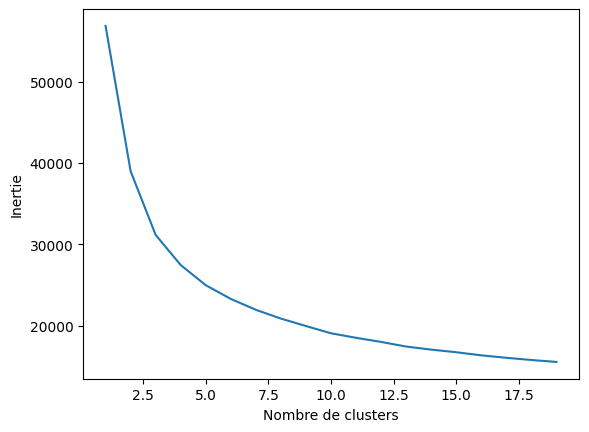

In [ ]:
# Calcul de la variance intra-clusters (inertie) pour chaque nb de clusters
tab_inertias = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init='auto')
    kmeans.fit(data_scaled)
    tab_inertias.append(kmeans.inertia_)

# Tracer la courbe d'inertie
plt.plot(range(1, 20), tab_inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

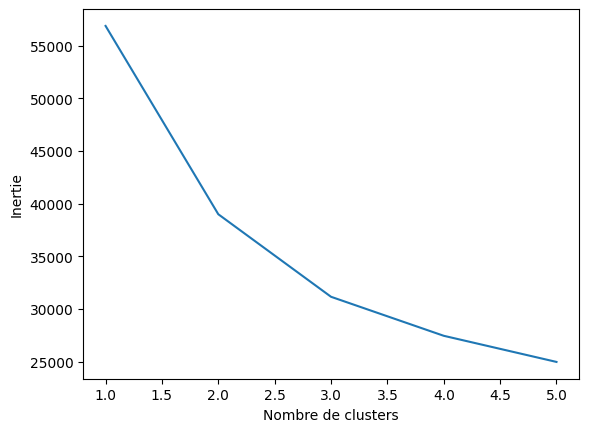

In [ ]:
# Pareil mais zoomé
plt.plot(range(1, 6), tab_inertias[0:5])
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

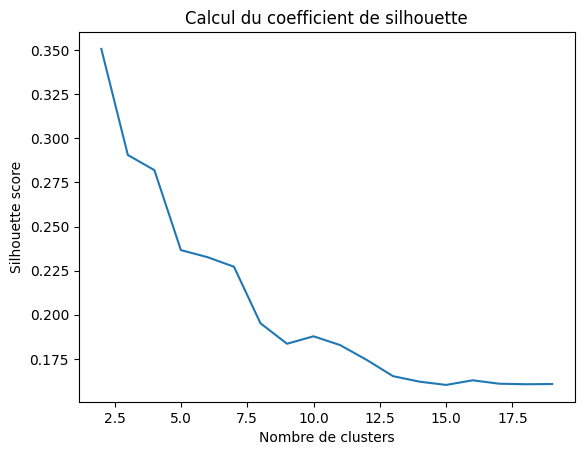

In [ ]:
silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init='auto')
    kmeans_pred = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans_pred))

# Tracer la courbe de silhouette score
plt.plot(range(2, 20), silhouette_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette score')
plt.title('Calcul du coefficient de silhouette')
plt.show()

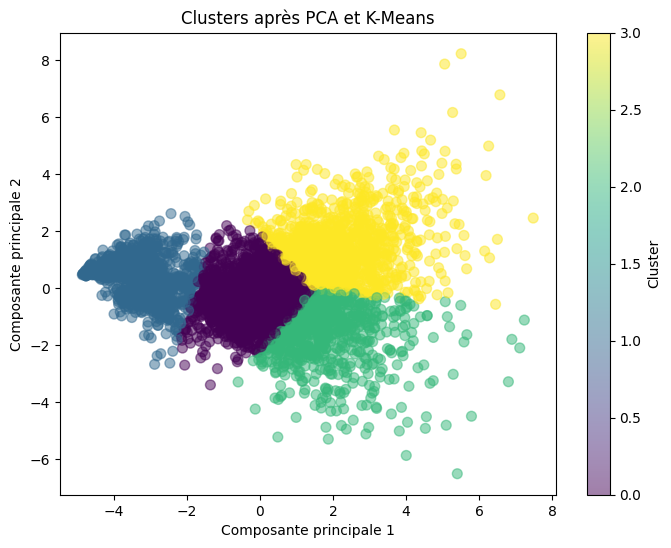

In [ ]:
# Appliquer PCA pour réduire la dimensionnalité
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

# Appliquer K-Means sur les données réduites
kmeans = KMeans(n_clusters=4, n_init='auto', init='k-means++')
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Visualiser les clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Clusters après PCA et K-Means')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
cluster_counts = Counter(cluster_labels)
print(cluster_counts)

Counter({0: 2463, 3: 1236, 1: 1156, 2: 831})


In [ ]:
df_pred = pd.DataFrame(cluster_labels, columns=['prediction'])

In [ ]:
result = pd.concat([data_selected, df_pred], axis=1)

In [ ]:
print(result.groupby('prediction')['WASHLOAD'].value_counts())

prediction  WASHLOAD
0            3          549
             2          473
             4          388
             1          319
             5          278
             6          141
             7          111
            -2           78
             8           44
             0           40
             10          27
             9            6
             12           4
             14           2
             13           1
             15           1
             20           1
1           -2          731
             2          113
             3           94
             1           91
             4           54
             5           29
             0           16
             7            9
             6            8
             8            4
             10           3
             9            2
             25           1
             12           1
2            10         187
             7          121
             5           77
             6           69



*   Cluster 0 : Utilise 2-3 fois la machine à laver
*   Cluster 1 : N'utilise pas la machine à laver
*   Cluster 2 : Utilise 7-10 fois la machine à laver
*   Cluster 3 : Utilise 2-3 fois la machine à laver



In [ ]:
print(result.groupby('prediction')['DRYRUSE'].value_counts())

prediction  DRYRUSE
0            3         523
             2         424
             4         363
             1         338
             5         274
            -2         145
             6         132
             7         107
             0          72
             8          41
             10         32
             9           7
             12          3
             14          1
             15          1
1           -2         756
             1          94
             2          91
             3          87
             4          51
             5          25
             0          18
             7          12
             6           8
             10          6
             9           3
             8           3
             20          1
             12          1
2            10        179
             7         122
             5          74
             6          68
             8          66
             15         55
             12         47
        

*   Cluster 0 : Utilise 2-3 fois le sèche linge
*   Cluster 1 : N'utilise pas le sèche linge
*   Cluster 2 : Utilise 7-10 fois le sèche linge
*   Cluster 3 : Utilise 2-3 fois le sèche linge


In [ ]:
print(result.groupby('prediction')['LGTOUTNUM'].value_counts())

prediction  LGTOUTNUM
0            1           1690
             2            495
             0            103
             3             96
            -2             79
1           -2           1084
             1             53
             0             19
2            1            319
             2            307
             3            192
             0              8
            -2              5
3            1            545
             2            470
             3            195
             0             25
            -2              1
Name: count, dtype: int64


*   Cluster 0,2,3 : Utilise d'ampoules à l'extérieur du logement
*   Cluster 1 : N'utilise pas d'ampoules à l'extérieur du logement

In [ ]:
print(result.groupby('prediction')['TOTALBTUSPH'].value_counts())

prediction  TOTALBTUSPH
0           0.000          147
            36.290           1
            14823.840        1
            14802.188        1
            14801.909        1
            14791.951        1
            14777.558        1
            14774.963        1
            14729.579        1
            14721.515        1
            14704.549        1
            14692.861        1
            14676.079        1
            14661.175        1
            14652.004        1
            14649.781        1
            14598.587        1
            14591.506        1
            14559.301        1
            14541.542        1
            14821.811        1
            14842.826        1
            14528.250        1
            14843.551        1
            15086.380        1
            15074.122        1
            15067.567        1
            15056.667        1
            15032.074        1
            15031.565        1
            15031.387        1
            150

*   Cluster 0 :
*   Cluster 1 : Utilise peu d'énergie pour chauffer le logement
*   Cluster 2 :
*   Cluster 3 : Utilise beaucoup d'énergie pour chauffer le logement

In [ ]:
print(result.groupby('prediction')['DOLELAHUHEAT'].value_counts())

prediction  DOLELAHUHEAT
0           0.00            538
            10.07             5
            3.22              5
            0.86              5
            3.32              5
            3.69              5
            41.11             4
            7.64              4
            12.12             4
            5.82              4
            3.09              4
            1.33              4
            3.37              4
            10.40             3
            18.22             3
            20.47             3
            17.50             3
            2.06              3
            1.92              3
            1.98              3
            19.35             3
            10.12             3
            6.33              3
            19.98             3
            10.00             3
            1.66              3
            10.18             3
            17.29             3
            11.44             3
            13.59             3
            4.1

*   Cluster 0 : Dépense peu pour chauffer le logement
*   Cluster 1 : Dépense peu pour chauffer le logement
*   Cluster 2 : Dépense beaucoup pour chauffer le logement
*   Cluster 3 : Dépense beaucoup pour chauffer le logement

In [ ]:
print(result.groupby('prediction')['SOLAR'].value_counts())

prediction  SOLAR
0            0       2361
            -2         79
             1         23
1           -2       1084
             0         72
2            0        789
             1         37
            -2          5
3            0       1214
             1         21
            -2          1
Name: count, dtype: int64


*   Cluster 0 : Utilise un peu l'énergie solaire
*   Cluster 1 : N'utilise pas du tout l'énergie solaire
*   Cluster 2 : Utilise un peu l'énergie solaire
*   Cluster 3 : Utilise un peu l'énergie solaire

In [ ]:
print(result.groupby('prediction')['TOTROOMS'].value_counts())

prediction  TOTROOMS
0           6           699
            5           598
            7           425
            4           320
            8           231
            9            84
            3            67
            10           23
            2             7
            11            6
            13            2
            12            1
1           4           382
            3           306
            5           182
            1           117
            2            92
            6            58
            7            13
            8             4
            9             1
            12            1
2           8           172
            7           158
            6           145
            9           123
            5            70
            10           70
            11           25
            4            21
            12           20
            13           13
            14            4
            18            3
            17            2

*   Cluster 0 : Beaucoup de chambres (5-7)
*   Cluster 1 : Peu de chambres (3-4)
*   Cluster 2 : Beaucoup de chambres (6-8)
*   Cluster 3 : Beaucoup de chambres (7-9)

In [ ]:
print(result.groupby('prediction')['WINDOWS'].value_counts())

prediction  WINDOWS
0           41         1002
            30          928
            42          214
            20          198
            50           95
            60           16
            10           10
1           20          567
            30          267
            10          239
            41           63
            42           13
            50            6
            60            1
2           41          325
            50          174
            42          150
            30           98
            60           67
            20           16
            10            1
3           41          432
            50          354
            42          249
            60          109
            30           87
            20            5
Name: count, dtype: int64


*   Cluster 0 : Beaucoup de fenêtres (30-40)
*   Cluster 1 : Peu de fenêtres (10-30)
*   Cluster 2 : Beaucoup de fenêtres (40-50)
*   Cluster 3 : Beaucoup de fenêtres (40-50)

In [ ]:
print(result.groupby('prediction')['MONEYPY'].value_counts())

prediction  MONEYPY
0           2          644
            3          486
            1          450
            4          354
            5          200
            6          141
            8          115
            7           73
1           1          431
            2          319
            3          147
            4          114
            5           50
            8           40
            6           39
            7           16
2           8          192
            4          121
            6          110
            3          107
            2          100
            5           92
            7           77
            1           32
3           8          237
            2          201
            4          171
            3          156
            5          153
            6          133
            7          111
            1           74
Name: count, dtype: int64


*   Cluster 0 : pauvres
*   Cluster 1 : pauvres
*   Cluster 2 : riches
*   Cluster 3 : riches

### DBSCAN

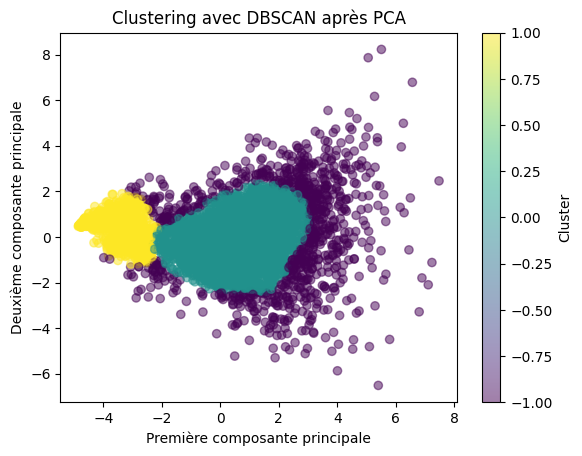

In [ ]:
# Réduction de dimension avec PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Initialiser le modèle DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=100)

# Appliquer DBSCAN sur les données réduites en dimension
labels = dbscan.fit_predict(data_pca)

# Visualisation des clusters en utilisant les deux premières composantes principales
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('Clustering avec DBSCAN après PCA')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
df_pred = pd.DataFrame(labels, columns=['prediction'])

In [ ]:
result = pd.concat([data_selected, df_pred], axis=1)

In [ ]:
# Supprimer toutes les lignes où la valeur de la colonne 'prediction' est -1
result = result[result['prediction'] != -1]

In [ ]:
result

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(result.groupby('prediction')['WASHLOAD'].value_counts())

prediction  WASHLOAD
0            3          769
             2          650
             4          584
             5          480
             1          410
             7          265
             6          254
             10         136
             8          106
            -2           78
             0           43
             9           19
             12          16
             14           9
             15           2
             20           1
             17           1
             16           1
             11           1
1           -2          671
             2           96
             3           88
             1           76
             4           42
             5           17
             0           14
             6            4
             7            2
             8            2
Name: count, dtype: int64



*   1er cluster : utilise la machine à laver
*   2e cluster : n'utilise pas la machine à laver ou peu



In [ ]:
print(result.groupby('prediction')['DRYRUSE'].value_counts())

prediction  DRYRUSE
0            3         750
             2         585
             4         552
             5         469
             1         433
             7         256
             6         248
            -2         158
             10        143
             8         107
             0          76
             9          20
             12         12
             14          7
             11          5
             15          2
             20          1
             16          1
1           -2         684
             2          83
             3          82
             1          80
             4          39
             5          18
             0          16
             7           5
             6           4
             9           1
Name: count, dtype: int64


*   1er cluster : utilise le sèche linge
*   2e cluster : n'utilise pas le sèche linge ou peu

In [ ]:
print(result.groupby('prediction')['LGTOUTNUM'].value_counts())

prediction  LGTOUTNUM
0            1           2309
             2           1012
             3            308
             0            117
            -2             79
1           -2            989
             1             16
             0              7
Name: count, dtype: int64


*   1er cluster : utilise des ampoules à l'extérieur du logement
*   2e cluster : n'utilise pas d'ampoules à l'extérieur du logement ou peu

In [ ]:
print(result.groupby('prediction')['TOTALBTUSPH'].value_counts())

prediction  TOTALBTUSPH
0           0.000          174
            61360.737        1
            61307.156        1
            61290.174        1
            61240.222        1
            61224.733        1
            61095.411        1
            61092.081        1
            61466.922        1
            60963.248        1
            60802.159        1
            60778.928        1
            60737.523        1
            60721.439        1
            60705.163        1
            61451.731        1
            61518.634        1
            60490.550        1
            61870.512        1
            61961.723        1
            61954.079        1
            61916.876        1
            61909.468        1
            61898.674        1
            61873.048        1
            61867.664        1
            61584.774        1
            61864.071        1
            61759.526        1
            61737.431        1
            61629.482        1
            616

*   1er cluster : utilise beaucoup d'énergie pour chauffer le logement
*   2e cluster : utilise peu d'énergie pour chauffer le logement

In [ ]:
print(result.groupby('prediction')['DOLELAHUHEAT'].value_counts())

prediction  DOLELAHUHEAT
0           0.00            665
            3.69              6
            3.32              5
            10.07             5
            3.22              5
            16.62             5
            0.86              5
            31.84             4
            41.11             4
            2.75              4
            6.33              4
            15.36             4
            33.32             4
            7.74              4
            20.88             4
            0.92              4
            1.33              4
            25.54             4
            7.37              4
            1.25              4
            3.37              4
            7.18              4
            14.33             4
            8.57              4
            12.18             4
            19.35             4
            17.34             4
            10.98             4
            17.28             4
            12.12             4
            8.6

*   1er cluster : dépense plus pour chauffer le logement
*   2e cluster : dépense moins pour chauffer le logement

In [ ]:
print(result.groupby('prediction')['TOTALDOLSPH'].value_counts())

prediction  TOTALDOLSPH
0           0.00           174
            384.61           3
            120.76           2
            203.47           2
            293.85           2
            36.84            2
            788.84           2
            678.32           2
            1013.19          2
            295.33           2
            688.85           2
            424.16           2
            263.13           2
            459.37           2
            582.16           2
            186.99           2
            373.09           2
            715.31           2
            679.21           2
            460.61           2
            588.72           2
            79.53            2
            199.19           2
            476.74           2
            513.76           2
            683.30           2
            479.16           2
            451.20           2
            45.03            2
            1334.72          2
            149.47           2
            195

*   1er cluster : dépense plus pour chauffer le logement
*   2e cluster : dépense moins pour chauffer le logement

In [ ]:
print(result.groupby('prediction')['SOLAR'].value_counts())

prediction  SOLAR
0            0       3691
            -2         79
             1         55
1           -2        989
             0         23
Name: count, dtype: int64


*   1er cluster : utilise un peu l'énergie solaire
*   2e cluster : n'utilise pas du tout l'énergie solaire

In [ ]:
print(result.groupby('prediction')['TOTROOMS'].value_counts())

prediction  TOTROOMS
0           6           938
            5           706
            7           705
            8           537
            4           339
            9           299
            10          120
            3            81
            11           47
            12           25
            13           17
            2             8
            14            2
            17            1
1           4           341
            3           269
            5           149
            1           112
            2            89
            6            43
            7             7
            8             1
            9             1
Name: count, dtype: int64


*   1er cluster : possède beaucoup de chambres
*   2e cluster : possède peu de chambres




In [ ]:
print(result.groupby('prediction')['WINDOWS'].value_counts())

prediction  WINDOWS
0           41         1581
            30         1064
            42          484
            50          401
            20          206
            60           76
            10           13
1           20          522
            10          227
            30          218
            41           35
            42            8
            50            2
Name: count, dtype: int64


*   1er cluster : possède beaucoup de fenêtres
*   2e cluster : possède peu de fenêtres

In [ ]:
print(result.groupby('prediction')['MONEYPY'].value_counts())

prediction  MONEYPY
0           2          866
            3          678
            4          566
            1          502
            5          384
            8          345
            6          292
            7          192
1           1          382
            2          277
            3          123
            4          104
            5           44
            6           37
            8           32
            7           13
Name: count, dtype: int64


*   1er cluster : riches
*   2e cluster : pauvres